<img src="CFG_logo.png" width="125">

# Big Data Challenge: Sustainability in a Post-Covid World

### The following analysis will help the Emergent Alliance, IBM and R$^2$ Data Labs understand:
1. How did the economy react when businesses had to close? 
2. Were some sectors (for instance energy production) more afffected than others? 
3. Is there a particular impact onto the economy and energy usage levels? 

<img src="EmergentAlliance_logo.jpg" width="225">
<img src="R2DataLabs_logo.jpg" width="250">

The Data Engineers of this challenge were R$^2$ Data Labs and Emergent Alliance partners. All the Excel data used in this analysis was sourced by them. Any external data used will be referenced accordingly.
<br><br>
The data used from the FTSE was sourced from the following:
- Yahoo Finance (2020), URL: [Yahoo Finance](https://finance.yahoo.com/?guccounter=1) (Accessed on 12 August 2020)
<br><br>

The data from the Industrial Production Index was sourced from the following:
- OECD (2020), Industrial production (indicator), doi: 10.1787/39121c55-en (Accessed on 12 August 2020)
<br><br>

The electricity data used was sourced from the UK government's published open-source data on energy usage.

#### Import appropriate libraries

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#### Function for loading Excel data

In [286]:
def load_excel_data(path, sheet_name=None, index_col=0, parse_dates=False):
    '''Load specified data set from an Excel sheet
    
    Args:
        path (str): The location of the Excel file.
        sheet_name (str or int or list): Specify which Excel sheet to load, can be sheet name, number (starting at 0) or list of sheets.
        index_col (int): Specify what index header are on.
    
    Returns:
        data: n rows from the dataframe.
    '''
    excel_df = pd.read_excel(path, sheet_name, index_col)
    return excel_df

---------------------------------------------------------------------------------------------------------------------------
## 3) Is there a particular impact onto the economy and energy usage levels? 

### Analysis of the 2020 energy demand compared to 2019 from Major Power Producers and Sustainable Renewables

In [287]:
# Load Excel data from Table 5.3, sheet 'Month'

elec_gen_by_MPP_months = load_excel_data('ET_5.3_AUG_20.xls', sheet_name='Month', index_col=3)
elec_gen_by_MPP_months

,Unnamed: 0,Unnamed: 1,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995,January,6.300000,3.495000,0.358300,0.874000,1.512000,0.050300,..,..,..
2,1995,February,6.257000,3.437000,0.343000,0.829000,1.589000,0.048600,..,..,..
3,1995,March*,7.443000,4.139000,0.380800,0.947000,1.912000,0.050800,..,..,..
4,1995,April,5.320000,2.560000,0.179800,0.756000,1.776000,0.038800,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...
303,2020,March,3.734560,0.158407,0.012067,1.577485,0.845854,0.050180,0.567809,0.487725,0.0350337
304,2020,April,3.030282,0.044485,0.007019,1.165947,0.948713,0.025804,0.345542,0.442426,0.0503458
305,2020,May,3.044369,0.019191,0.005774,1.105274,1.030223,0.020148,0.322117,0.480496,0.0611457
306,2020,June,3.085639,0.039362,0.005563,1.346934,0.821137,0.019213,0.340155,0.46688,0.0463951


In [4]:
# Clean data set from Excel Table 5.3

elec_gen_by_MPP_months_clean = elec_gen_by_MPP_months.rename(columns = {'Unnamed: 0':'Year', 'Unnamed: 1':'Month'})\
                                                            .drop(index=[0, 307])
elec_gen_by_MPP_months_clean

,Year,Month,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
1,1995,January,6.300000,3.495000,0.358300,0.874000,1.512000,0.050300,..,..,..
2,1995,February,6.257000,3.437000,0.343000,0.829000,1.589000,0.048600,..,..,..
3,1995,March*,7.443000,4.139000,0.380800,0.947000,1.912000,0.050800,..,..,..
4,1995,April,5.320000,2.560000,0.179800,0.756000,1.776000,0.038800,..,..,..
5,1995,May,5.072000,2.452000,0.200000,0.841000,1.551000,0.018800,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...
302,2020,February,3.769000,0.293049,0.012908,1.232960,0.991432,0.053492,0.72381,0.445655,0.0156959
303,2020,March,3.734560,0.158407,0.012067,1.577485,0.845854,0.050180,0.567809,0.487725,0.0350337
304,2020,April,3.030282,0.044485,0.007019,1.165947,0.948713,0.025804,0.345542,0.442426,0.0503458
305,2020,May,3.044369,0.019191,0.005774,1.105274,1.030223,0.020148,0.322117,0.480496,0.0611457


In [5]:
# Load Excel data from Table 5.6, sheet 'Annual'

imports_exports_annual = load_excel_data('ET_5.6_JUN_20.xls', sheet_name='Annual', index_col=[4, 5])
imports_exports_annual

Unnamed: 0_level_0 Unnamed: 1_level_0     France-UK               \
         Unnamed: 0_level_1 Unnamed: 1_level_1       Imports      Exports   
0                      1998                NaN  12787.372000     0.000000   
1                      1999                NaN  14484.490000     0.000000   
2                      2000                NaN  14267.240000     0.930000   
3                      2001                NaN  10562.567000   193.116000   
4                      2002                NaN   9042.032000   620.599000   
5                      2003                NaN   4999.951000  2872.711000   
6                      2004                NaN  10027.003000   728.280000   
7                      2005                NaN  11158.929000   765.020000   
8                      2006                NaN  10592.201282   861.338971   
9                      2007                NaN   8562.134000  2016.420000   
10                     2008                NaN  12142.126678   898.249303   
11                     2009                NaN   6523.759955  3296.056390   
12                     2010                NaN   6998.088225  4102.871880   
13                     2011                NaN   6031.351229  1353.673013   
14                     2012                NaN   7549.554957  1184.842877   
15                     2013                NaN  10836.834376   534.451449   
16                     2014                NaN  14964.685109    13.321705   
17                     2015                NaN  14012.289325   174.330625   
18                     2016                NaN  11057.759405  1330.098840   
19                     2017                NaN   9432.216000  2250.864000   
20                     2018                NaN  13286.841000   396.545000   
21                   2019 p                NaN  11875.344500   728.592500   
22                      NaN                NaN           NaN          NaN   
23  Return to contents page                NaN           NaN          NaN   

    Ireland-NI              Netherlands-UK             Ireland-Wales  \
       Imports      Exports        Imports     Exports       Imports   
0    51.957000   130.580000            NaN         NaN           NaN   
1    22.727000   262.854000            NaN         NaN           NaN   
2    41.003000   133.115000            NaN         NaN           NaN   
3   100.917000    70.529000            NaN         NaN           NaN   
4   140.427000   147.975000            NaN         NaN           NaN   
5   119.349000    86.277000            NaN         NaN           NaN   
6     0.319000  1574.205000            NaN         NaN           NaN   
7     1.136000  2074.159000            NaN         NaN           NaN   
8     9.932000  1787.941000            NaN         NaN           NaN   
9    53.271000  1381.985000            NaN         NaN           NaN   
10  151.558106   373.326923            NaN         NaN           NaN   
11   85.303067   452.197362            NaN         NaN           NaN   
12  145.418810   379.131537            NaN         NaN           NaN   
13  120.725565   365.817577    2538.003625  747.488899           NaN   
14  172.730833   332.999900    6029.957938  266.568475     22.086701   
15  156.702713   201.949900    6478.486051  143.473054     60.787565   
16  243.029857   122.139178    7866.888094   11.064727    168.532368   
17  489.564805   155.288916    8006.288840    7.650850    452.728470   
18  638.643568   240.040976    7447.337050  141.190680    874.183357   
19  270.714679   380.809237    7050.615000  192.934500   1413.434500   
20  376.779850   847.851410    6391.886000  207.131500   1276.908000   
21  302.010570  1126.621470    6049.424000  354.268000   1237.902500   
22         NaN          NaN            NaN         NaN           NaN   
23         NaN          NaN            NaN         NaN           NaN   

                Belgium-UK                  Total               \
        Exports    Imports  Exports       Imports      Exports   
0

In [6]:
# Clean data set from Excel Table 5.6

imports_exports_annual_clean = imports_exports_annual.drop(imports_exports_annual.columns[1], axis=1)\
                        .drop(index=[22, 23])\
                        .fillna(0)\
                        .rename(columns = {'Unnamed: 0_level_0':'Year', 'Unnamed: 0_level_1':''})\
                        .set_index('Year')\
                        .rename({'2019 p':'2019'})
imports_exports_annual_clean

France-UK               Ireland-NI              Netherlands-UK  \
           Imports      Exports     Imports      Exports        Imports   
Year                                                                      
1998  12787.372000     0.000000   51.957000   130.580000       0.000000   
1999  14484.490000     0.000000   22.727000   262.854000       0.000000   
2000  14267.240000     0.930000   41.003000   133.115000       0.000000   
2001  10562.567000   193.116000  100.917000    70.529000       0.000000   
2002   9042.032000   620.599000  140.427000   147.975000       0.000000   
2003   4999.951000  2872.711000  119.349000    86.277000       0.000000   
2004  10027.003000   728.280000    0.319000  1574.205000       0.000000   
2005  11158.929000   765.020000    1.136000  2074.159000       0.000000   
2006  10592.201282   861.338971    9.932000  1787.941000       0.000000   
2007   8562.134000  2016.420000   53.271000  1381.985000       0.000000   
2008  12142.126678   898.249303  151.558106   373.326923       0.000000   
2009   6523.759955  3296.056390   85.303067   452.197362       0.000000   
2010   6998.088225  4102.871880  145.418810   379.131537       0.000000   
2011   6031.351229  1353.673013  120.725565   365.817577    2538.003625   
2012   7549.554957  1184.842877  172.730833   332.999900    6029.957938   
2013  10836.834376   534.451449  156.702713   201.949900    6478.486051   
2014  14964.685109    13.321705  243.029857   122.139178    7866.888094   
2015  14012.289325   174.330625  489.564805   155.288916    8006.288840   
2016  11057.759405  1330.098840  638.643568   240.040976    7447.337050   
2017   9432.216000  2250.864000  270.714679   380.809237    7050.615000   
2018  13286.841000   396.545000  376.779850   847.851410    6391.886000   
2019  11875.344500   728.592500  302.010570  1126.621470    6049.424000   

                 Ireland-Wales              Belgium-UK                  Total  \
         Exports       Imports      Exports    Imports  Exports       Imports   
Year                                                                            
1998    0.000000      0.000000     0.000000      0.000    0.000  12839.329000   
1999    0.000000      0.000000     0.000000      0.000    0.000  14507.217000   
2000    0.000000      0.000000     0.000000      0.000    0.000  14308.243000   
2001    0.000000      0.000000     0.000000      0.000    0.000  10663.484000   
2002    0.000000      0.000000     0.000000      0.000    0.000   9182.459000   
2003    0.000000      0.000000     0.000000      0.000    0.000   5119.300000   
2004    0.000000      0.000000     0.000000      0.000    0.000  10027.322000   
2005    0.000000      0.000000     0.000000      0.000    0.000  11160.065000   
2006    0.000000      0.000000     0.000000      0.000    0.000  10602.133282   
2007    0.000000      0.000000     0.000000      0.000    0.000   8615.405000   
2008    0.000000      0.000000     0.000000      0.000    0.000  12293.684784   
2009    0.000000      0.000000     0.000000      0.000    0.000   6609.063022   
2010    0.000000      0.000000     0.000000      0.000    0.000   7143.507035   
2011  747.488899      0.000000     0.000000      0.000    0.000   8690.080419   
2012  266.568475     22.086701   125.983256      0.000    0.000  13774.330428   
2013  143.473054     60.787565  2222.046415      0.000    0.000  17532.810705   
2014   11.064727    168.532368  2576.821464      0.000    0.000  23243.135428   
2015    7.650850    452.728470  1518.042231      0.000    0.000  22960.871440   
2016  141.190680    874.183357   561.535576      0.000    0.000  20017.923380   
2017  192.934500   1413.434500   582.441500      0.000    0.000  18166.980179   
2018  207.131500   1276.908000   773.236000      0.000    0.000  21332.414850   
2019  354.268000   1237.902500  1057.867500   5090.905  117.767  24555.586570   

                     Scotland-England    England-Scotland         Scotland-NI  \
          Exports Unnamed:

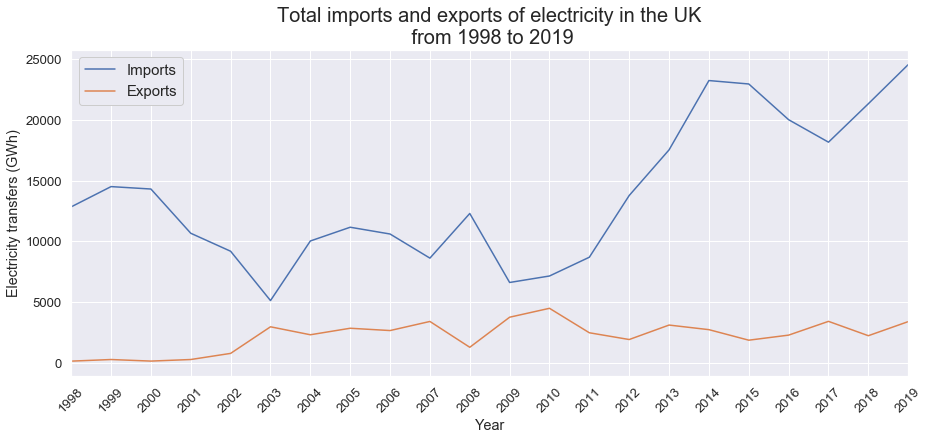

In [87]:
# Access Total Imports and Total Exports columns from the dataframe

imports_exports_annual_total_im = imports_exports_annual_clean.loc(axis=1)['Total', 'Imports']
imports_exports_annual_total_ex = imports_exports_annual_clean.loc(axis=1)['Total', 'Exports']
year = imports_exports_annual_clean.index

# Create plot of total imports and exports of electricity in the UK from 1998 to 2019

fig, ax = plt.subplots(figsize=(15, 6))
sns.set(font_scale=1.2)
sns.set_palette('bright')

sns.lineplot(x=year, y=imports_exports_annual_total_im, label='Imports')
sns.lineplot(x=year, y=imports_exports_annual_total_ex, label='Exports')

ax.set(xlabel='Year', ylabel='Electricity transfers (GWh)')
plt.xlim(1998, 2019)
plt.xticks(range(1998, 2020))
plt.xticks(rotation=45)

ax.set_title('Total imports and exports of electricity in the UK\n from 1998 to 2019', fontsize=20)

ax.legend(prop={'size': 15}, framealpha=1.0)

Text(0.5, 1.0, 'Total fuel used in electricity generation by Major Power Producers (MMPs)\n from 1995 to 2020')

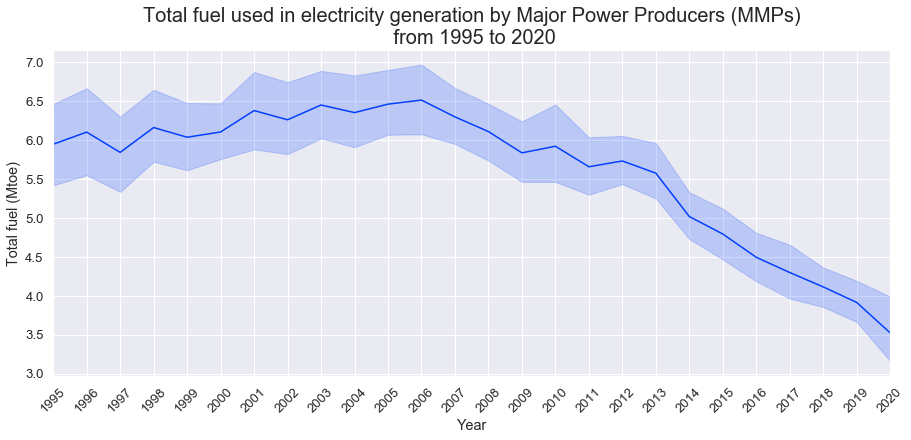

In [8]:
# Create a plot of total fuel used in electricity generation by Major Power Producers (MMPs) from 1995 to 2020

fig, ax = plt.subplots(figsize=(15, 6))
sns.set(font_scale=1.2)

sns.lineplot(data=elec_gen_by_MPP_months_clean, x='Year', y='Total', ax=ax)

ax.set(xlabel='Year', ylabel='Total fuel (Mtoe)')
plt.xlim(1995, 2020)
plt.xticks(range(1995, 2021))
plt.xticks(rotation=45)

ax.set_title('Total fuel used in electricity generation by Major Power Producers (MMPs)\n from 1995 to 2020', fontsize=20)

### Quantitative analysis of the total fuel used in electricity generation by Major Power Producers (MMPs) from 1995 to 2020

- The above plot shows the mean and 95% confidence interval of the total fuel used in electricity generation by MMPs from 1995 to 2020
    - From approximately 2006, there has been a decreasing trend 
    - In 2020, it has almost halved from its peak years in the early 2000s
    - Since 2010, the UK has been a net importer of electricity, as seen by the plot titled 'Total imports and exports of electricity in the UK from 1998 to 2019', which explains the steady decrease of UK electricity generation

<br>

In [9]:
# Create a seperate dataframe with just April, May and June 2020 data

elec_gen_by_MPP_2020 = elec_gen_by_MPP_months_clean[elec_gen_by_MPP_months_clean['Year']==2020]
elec_gen_by_MPP_2020_amj = elec_gen_by_MPP_2020.iloc[3:6]
elec_gen_by_MPP_2020_amj

,Year,Month,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
304,2020,April,3.030282,0.044485,0.007019,1.165947,0.948713,0.025804,0.345542,0.442426,0.0503458
305,2020,May,3.044369,0.019191,0.005774,1.105274,1.030223,0.020148,0.322117,0.480496,0.0611457
306,2020,June,3.085639,0.039362,0.005563,1.346934,0.821137,0.019213,0.340155,0.46688,0.0463951


In [10]:
# Create a seperate dataframe with just April, May and June 2019 data

elec_gen_by_MPP_2019 = elec_gen_by_MPP_months_clean[elec_gen_by_MPP_months_clean['Year']==2019]
elec_gen_by_MPP_2019_amj = elec_gen_by_MPP_2019.iloc[3:6]
elec_gen_by_MPP_2019_amj

,Year,Month,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
292,2019,April,3.795566,0.081211,0.009096,1.771330,1.148695,0.018422,0.349022,0.378409,0.0393808
293,2019,May,3.684179,0.015821,0.010125,1.781089,1.141701,0.011291,0.23311,0.445232,0.045809
294,2019,June,3.303601,0.030337,0.009709,1.685580,0.791767,0.019667,0.30761,0.418889,0.040042


In [11]:
# Create a dataframe with just April, May and June 2019 and 2020 data

elec_gen_by_MPP_2019_2020_amj = pd.concat([elec_gen_by_MPP_2019_amj, elec_gen_by_MPP_2020_amj])
elec_gen_by_MPP_2019_2020_amj.set_index(['Year', 'Month'])

Total      Coal       Oil       Gas   Nuclear     Hydro  \
Year Month                                                               
2019 April  3.795566  0.081211  0.009096  1.771330  1.148695  0.018422   
     May    3.684179  0.015821  0.010125  1.781089  1.141701  0.011291   
     June   3.303601  0.030337  0.009709  1.685580  0.791767  0.019667   
2020 April  3.030282  0.044485  0.007019  1.165947  0.948713  0.025804   
     May    3.044369  0.019191  0.005774  1.105274  1.030223  0.020148   
     June   3.085639  0.039362  0.005563  1.346934  0.821137  0.019213   

                Wind Bioenergy      Solar  
Year Month                                 
2019 April  0.349022  0.378409  0.0393808  
     May     0.23311  0.445232   0.045809  
     June    0.30761  0.418889   0.040042  
2020 April  0.345542  0.442426  0.0503458  
     May    0.322117  0.480496  0.0611457  
     June   0.340155   0.46688  0.0463951

### Multiple plots showing the comparison between energy generation fuels in April, May and June 2019 vs 2020

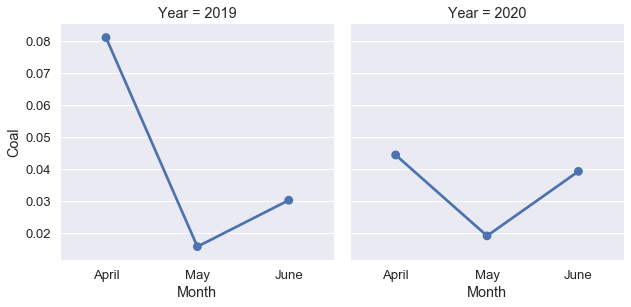

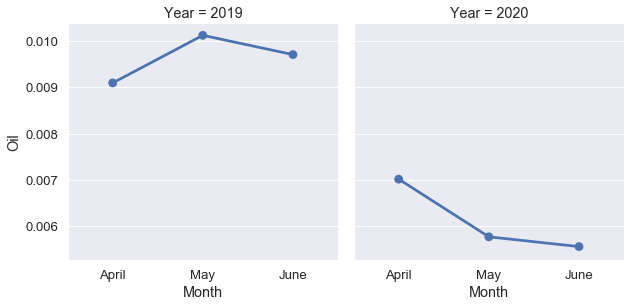

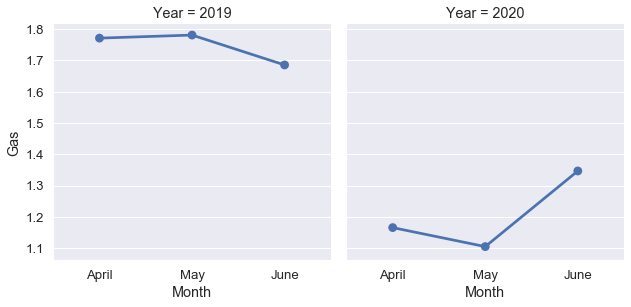

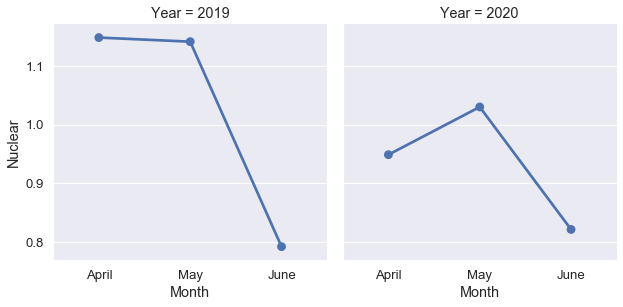

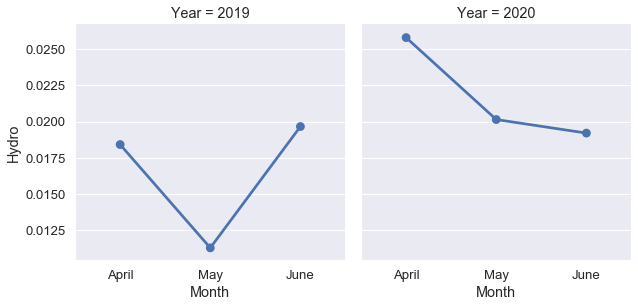

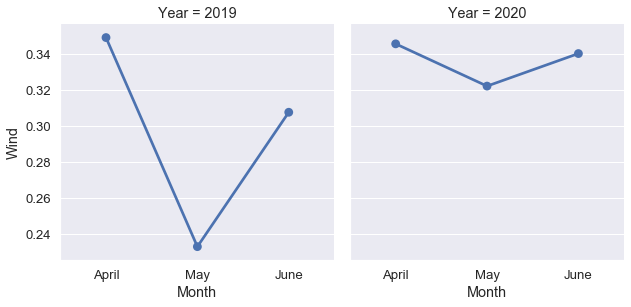

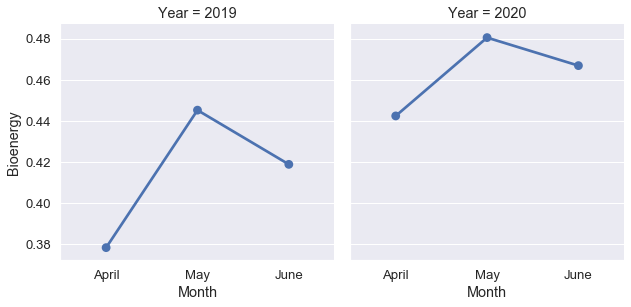

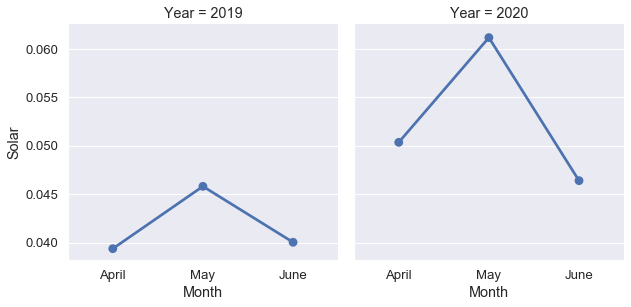

In [12]:
sns.set(font_scale=1.2)

order = ['April', 'May', 'June']

for col in elec_gen_by_MPP_2019_2020_amj.columns[3:]:
    elec_gen_by_MPP_2019_2020_amj_plot = sns.FacetGrid(elec_gen_by_MPP_2019_2020_amj, col='Year', height=4.5, aspect=1)
    elec_gen_by_MPP_2019_2020_amj_plot.map(sns.pointplot, 'Month', col, order=order)


### Quantitative analysis of the different types of energy generation in April, May and June 2019 vs 2020

- Non-renewable energy generation sources, such as coal, oil and gas, plus the low-carbon energy produced from Nuclear sources, all had an overall decrease in usage in April, May and June 2020 than in the same period of 2019
    - The UK set a record of its longest period without using coal to produce electricity, between 10th April 2020 - 16th June 2020
    - Maintence outages at major nuclear power sites during this period is the cause of decreased nuclear power generation for electricity, compared to the same period in 2019
<br><br>
- Renewable energy generation sources, such as hydro, wind, bioenergy and solar, all had an overall increase in usage in April, May and June 2020 than in the same period of 2019
    - Increased period of sunny weather compared to the same period in 2019 increased solar generation 
    - Large storms though the previous quarter increased wind and hydro electricity generation

### Plot showing the comparison between total energy generation from fuels in April, May and June 2019 vs 2020 

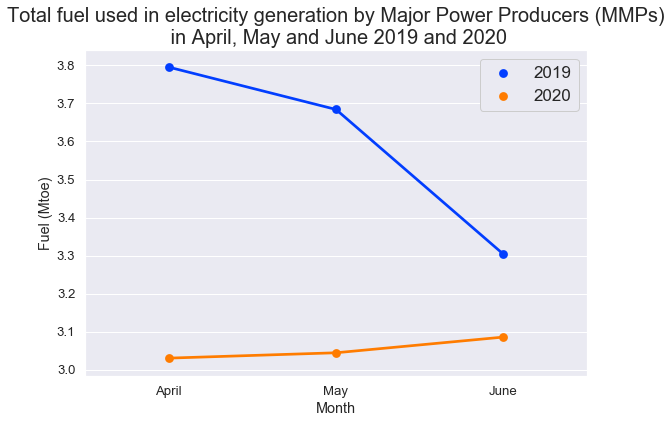

In [13]:
fig, ax = plt.subplots(figsize=(9,6))
sns.set(font_scale=1.2)

sns.pointplot(data=elec_gen_by_MPP_2019_2020_amj, x='Month', y='Total', hue='Year', palette='bright', ax=ax)

ax.set(xlabel='Month', ylabel='Fuel (Mtoe)')
ax.set_title('Total fuel used in electricity generation by Major Power Producers (MMPs)\n in April, May and June 2019 and 2020', fontsize=20)

ax.legend(prop={'size': 17}, framealpha=1.0)

In [14]:
elec_gen_by_MPP_2019_amj['Total'].describe()

count    3.000000
mean     3.594449
std      0.257965
min      3.303601
25%      3.493890
50%      3.684179
75%      3.739873
max      3.795566
Name: Total, dtype: float64

In [15]:
elec_gen_by_MPP_2020_amj['Total'].describe()

count    3.000000
mean     3.053430
std      0.028770
min      3.030282
25%      3.037325
50%      3.044369
75%      3.065004
max      3.085639
Name: Total, dtype: float64

<br><br>
#### Function for calculating the difference of various statistics from the data

In [16]:
def difference(num1, num2, func):
    ''' Calculate the numerical difference between 2 statistics.
    
    Args:
        num1 (float): The first number.
        num2 (float): The second number. 
        func (function): Function to operate on both numbers. 
        
    Returns:
        Numerical difference between a function of num1 and num2.
    '''
    return func(num1) - func(num2)

In [17]:
# Mean difference
elec_gen_by_MPP_2019_2020_amj_mean = difference(elec_gen_by_MPP_2020_amj['Total'], elec_gen_by_MPP_2019_amj['Total'], np.mean)

# Minimum difference 
elec_gen_by_MPP_2019_2020_amj_min = difference(elec_gen_by_MPP_2020_amj['Total'], elec_gen_by_MPP_2019_amj['Total'], np.min)

# Maximum difference
elec_gen_by_MPP_2019_2020_amj_max = difference(elec_gen_by_MPP_2020_amj['Total'], elec_gen_by_MPP_2019_amj['Total'], np.max)

In [18]:
# IQR difference
elec_gen_by_MPP_2020_amj_q75, elec_gen_by_MPP_2020_amj_q25 = np.percentile(elec_gen_by_MPP_2020_amj['Total'], [75, 25])
elec_gen_by_MPP_2019_amj_q75, elec_gen_by_MPP_2019_amj_q25 = np.percentile(elec_gen_by_MPP_2019_amj['Total'], [75, 25])

elec_gen_by_MPP_2020_amj_IQR = elec_gen_by_MPP_2020_amj_q75 - elec_gen_by_MPP_2020_amj_q25
elec_gen_by_MPP_2019_amj_IQR = elec_gen_by_MPP_2019_amj_q75 - elec_gen_by_MPP_2019_amj_q25

elec_gen_by_MPP_2019_2020_amj_IQR = elec_gen_by_MPP_2020_amj_IQR - elec_gen_by_MPP_2019_amj_IQR

#### Function for calculating the percentage difference of various statistics from the data

In [19]:
def percentage_diff(diff, num1, func):
    ''' Calculate the percentage difference between 2 statistics.
    
    Args:
        diff (float): The numerical difference between the two numbers we want the percentage difference of.
        num1 (float): The original number used when calculating the difference.
        func (function): Function to operate on the original number. 
        
    Returns:
        Percentage difference.
    '''
    perc_diff = (diff / func(num1)) * 100
    return perc_diff

In [20]:
# Mean percentage difference
elec_gen_by_MPP_2019_2020_amj_mean_pd = percentage_diff(elec_gen_by_MPP_2019_2020_amj_mean, elec_gen_by_MPP_2020_amj['Total'], np.mean)

# Minimum percentage difference
elec_gen_by_MPP_2019_2020_amj_max_pd = percentage_diff(elec_gen_by_MPP_2019_2020_amj_min, elec_gen_by_MPP_2020_amj['Total'], np.min)

# Maximum percentage difference
elec_gen_by_MPP_2019_2020_amj_min_pd = percentage_diff(elec_gen_by_MPP_2019_2020_amj_max, elec_gen_by_MPP_2020_amj['Total'], np.max)

# IQR percentage difference
elec_gen_by_MPP_2019_2020_amj_IQR_pd = (elec_gen_by_MPP_2019_2020_amj_IQR / elec_gen_by_MPP_2020_amj_IQR) * 100

In [21]:
# Create a dataframe for the summary statistics of April, May and June 2019 and 2020

elec_gen_by_MPP_2019_2020_amj_stats = {
    'Statistic': ['Mean', 'Minimum', 'Maximum', 'IQR'],
    'Difference': [elec_gen_by_MPP_2019_2020_amj_mean, elec_gen_by_MPP_2019_2020_amj_min, elec_gen_by_MPP_2019_2020_amj_max, elec_gen_by_MPP_2019_2020_amj_IQR],
    '% Difference': [elec_gen_by_MPP_2019_2020_amj_mean_pd, elec_gen_by_MPP_2019_2020_amj_max_pd, elec_gen_by_MPP_2019_2020_amj_min_pd, elec_gen_by_MPP_2019_2020_amj_IQR_pd]
}

elec_gen_by_MPP_2019_2020_amj_stats_df = pd.DataFrame(elec_gen_by_MPP_2019_2020_amj_stats).set_index('Statistic')

### From April, May and June 2019 to 2020, the total fuel used in electricity generation by MMPs overall decreased. The following statistics summarise the quantitative analysis:

In [22]:
elec_gen_by_MPP_2019_2020_amj_stats_df

,Difference,% Difference
Statistic,,
Mean,-0.541019,-17.718389
Minimum,-0.273319,-9.019590
Maximum,-0.709927,-23.007446
IQR,-0.218304,-788.704328


### Qualitative analysis of the decrease in total fuel used in electricity generation by MMPs in April, May and June 2020 compared to the same period in 2019

- Increased renewable energy generation (wind, solar, hydro and bioenergy) as seen on the Facet Grids above
    - Large storms during January and February 2020
    - Large period of warm weather from March - June 2020
<br><br>
- UK's COVID-19 lockdown started on the 23rd March 2020 which forced the closure of many UK businesses and offices
    - Increased number of people working from home 
    - Large amounts of electricity used to power the UK's industrial sector was neither needed nor used 
    - Resulted in an overall decresase in demand for electricity 

### Quantitative analysis of the total fuel used in electricity generation by Major Power Producers (MMPs) in 2019 and 2020

In [23]:
# Create a dataframe with only the months of 2019 and 2020 data for fuel used in electricity generation by MMPs

elec_gen_by_MPP_2019_2020_months = pd.concat([elec_gen_by_MPP_2019, elec_gen_by_MPP_2020])
elec_gen_by_MPP_2019_2020_months.set_index(['Year', 'Month'])

Total      Coal       Oil       Gas   Nuclear     Hydro  \
Year Month                                                                   
2019 January    4.974732  0.496966  0.024492  2.401304  1.148261  0.034654   
     February   3.886936  0.170772  0.012758  1.767376  1.074694  0.032953   
     March      3.908008  0.124310  0.008913  1.705206  1.057124  0.045886   
     April      3.795566  0.081211  0.009096  1.771330  1.148695  0.018422   
     May        3.684179  0.015821  0.010125  1.781089  1.141701  0.011291   
     June       3.303601  0.030337  0.009709  1.685580  0.791767  0.019667   
     July       3.568206  0.043610  0.013483  1.814548  0.962963  0.020336   
     August     3.405554  0.095831  0.010036  1.349623  1.075062  0.030033   
     September  3.498622  0.060115  0.012049  1.403742  1.168185  0.036702   
     October    4.116886  0.124163  0.012311  1.819542  1.247612  0.040741   
     November   4.453896  0.308800  0.015510  1.962124  1.209659  0.023917   
     December   4.348215  0.290018  0.015225  1.614391  1.226800  0.045659   
2020 January    4.464054  0.416564  0.013952  1.536764  1.254131  0.051626   
     February   3.769000  0.293049  0.012908  1.232960  0.991432  0.053492   
     March      3.734560  0.158407  0.012067  1.577485  0.845854  0.050180   
     April      3.030282  0.044485  0.007019  1.165947  0.948713  0.025804   
     May        3.044369  0.019191  0.005774  1.105274  1.030223  0.020148   
     June       3.085639  0.039362  0.005563  1.346934  0.821137  0.019213   

                    Wind Bioenergy       Solar  
Year Month                                      
2019 January     0.41461  0.446024  0.00842029  
     February   0.429419  0.379759   0.0192056  
     March      0.510813  0.427663   0.0280951  
     April      0.349022  0.378409   0.0393808  
     May         0.23311  0.445232    0.045809  
     June        0.30761  0.418889    0.040042  
     July       0.258122  0.410556   0.0445902  
     August     0.386648   0.41757   0.0407524  
     September  0.400214  0.385669   0.0319453  
     October    0.471608  0.383068   0.0178402  
     November   0.402643   0.52239  0.00885461  
     December   0.571701   0.57743    0.006991  
2020 January    0.653239  0.529337  0.00843995  
     February    0.72381  0.445655   0.0156959  
     March      0.567809  0.487725   0.0350337  
     April      0.345542  0.442426   0.0503458  
     May        0.322117  0.480496   0.0611457  
     June       0.340155   0.46688   0.0463951

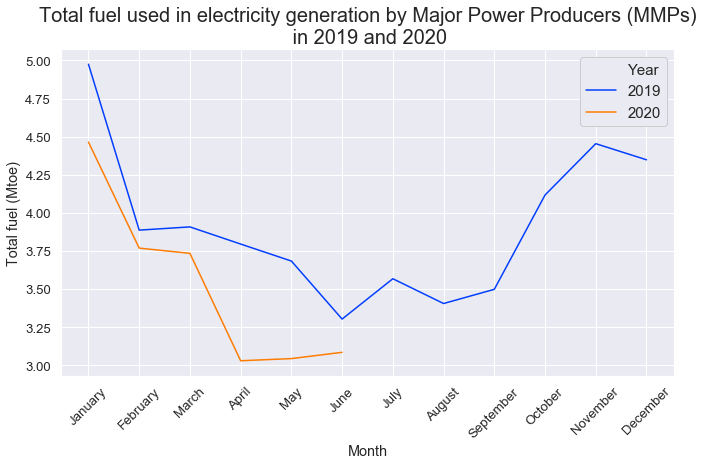

In [24]:
# Create a plot with only the months of 2019 and 2020 data for fuel used in electricity generation by MMPs

fig, ax = plt.subplots(figsize=(11, 6))
sns.set(font_scale=1.2)

sns.lineplot(data=elec_gen_by_MPP_2019_2020_months, x='Month', y='Total', hue='Year', palette='bright', ax=ax, sort=False)

ax.set(xlabel='Month', ylabel='Total fuel (Mtoe)')
plt.xticks(rotation=45)
ax.set_title('Total fuel used in electricity generation by Major Power Producers (MMPs)\n in 2019 and 2020', fontsize=20)

ax.legend(prop={'size': 15}, framealpha=1.0)

### Qualitative analysis of the trends in total fuel used in electricity generation by MMPs in 2019 and 2020

- Increased fuel usage for electricity generation in winter months of 2019 (as expected)
- Decreased fuel usage for electricity generation in summer months of 2019 (as expected)
<br><br>
- Increased fuel usage for electricity generation in January of 2020 as expected, with a decrease of 0.510678 Mtoe of total fuel usage compared to January 2019
    - Due to the temperatures in January 2020 being higher than in January 2019
<br><br>
- Trend in total fuel usage consistent throughout January - March 2020 compared to the same period in 2019
<br><br>
- UK's COVID-19 lockdown started on the 23rd March 2020, which subsequently decreased total fuel usage sharply
    - 0.765284 Mtoe of total fuel usage decrease in April 2020 compared to April 2019
    - Total fuel usage between March and April 2020 decreased by 0.704278, compared to a decrease of 0.112442 in the same period in 2019
<br><br>
- Total fuel usage leveling off thoughout April - June 2020, with a small increase as lockdown restrictions were eased
- As of June 2020, total fuel usage levels by MMPs is not as high as corresponding periods in 2019

<br><br>
### Quantitative analysis of the stock changes of energy companies from August 2015 - August 2020

In [253]:
# Load Excel data from hackathon_stocks.xlsx

stocks = load_excel_data('hackathon_stocks.xlsx', sheet_name=0, parse_dates='Date')
stocks.head()

,Date,^FTSE,III,ADM,AAL,ANTO,AHT,ABF,AZN,AUTO,...,STAN,SLA,STJ,TW,TSCO,ULVR,UU,VOD,WTB,WPP
0,2015-08-13,6568.299805,465.132538,1282.060059,649.455261,503.366699,873.043091,3001.178955,3520.581055,333.650970,...,758.006714,352.942688,762.827881,-0.007282,186.829681,2406.857666,700.313538,177.035095,4713.619141,1115.634766
1,2015-08-14,6550.700195,467.772888,1267.971558,642.577637,500.728882,873.961182,3025.351807,3499.162109,332.223877,...,752.693420,354.391724,777.101257,-0.007413,187.430893,2394.908447,706.658386,176.702423,4718.164551,1107.046997
2,2015-08-17,6550.299805,464.252441,1295.268066,641.219238,504.245911,873.961182,3046.735840,3524.288330,340.596100,...,742.674744,352.459442,765.206787,-0.007413,187.014694,2389.787842,712.210144,176.776337,4677.255859,1110.950562
3,2015-08-18,6526.299805,463.372375,1290.865479,629.926514,493.694977,872.124939,3045.805908,3550.650391,337.741974,...,739.364136,356.001404,767.982117,-0.007366,183.685043,2373.571045,717.365356,177.146011,4649.982422,1112.512085
4,2015-08-19,6403.500000,449.290771,1340.175659,602.331726,485.342194,836.781067,2995.600342,3492.983398,342.308563,...,719.588379,355.840759,753.708923,-0.007377,180.124191,2328.335449,713.399780,173.745056,4595.437500,1092.994263


In [255]:
# Clean data set from hackathon_stocks.xlsx

stocks_clean = stocks.set_index('Date').fillna(0).drop(index=datetime.date(2020, 7, 20))
stocks_clean.head()

,^FTSE,III,ADM,AAL,ANTO,AHT,ABF,AZN,AUTO,AVST,...,STAN,SLA,STJ,TW,TSCO,ULVR,UU,VOD,WTB,WPP
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-13,6568.299805,465.132538,1282.060059,649.455261,503.366699,873.043091,3001.178955,3520.581055,333.650970,0.0,...,758.006714,352.942688,762.827881,-0.007282,186.829681,2406.857666,700.313538,177.035095,4713.619141,1115.634766
2015-08-14,6550.700195,467.772888,1267.971558,642.577637,500.728882,873.961182,3025.351807,3499.162109,332.223877,0.0,...,752.693420,354.391724,777.101257,-0.007413,187.430893,2394.908447,706.658386,176.702423,4718.164551,1107.046997
2015-08-17,6550.299805,464.252441,1295.268066,641.219238,504.245911,873.961182,3046.735840,3524.288330,340.596100,0.0,...,742.674744,352.459442,765.206787,-0.007413,187.014694,2389.787842,712.210144,176.776337,4677.255859,1110.950562
2015-08-18,6526.299805,463.372375,1290.865479,629.926514,493.694977,872.124939,3045.805908,3550.650391,337.741974,0.0,...,739.364136,356.001404,767.982117,-0.007366,183.685043,2373.571045,717.365356,177.146011,4649.982422,1112.512085
2015-08-19,6403.500000,449.290771,1340.175659,602.331726,485.342194,836.781067,2995.600342,3492.983398,342.308563,0.0,...,719.588379,355.840759,753.708923,-0.007377,180.124191,2328.335449,713.399780,173.745056,4595.437500,1092.994263


### Quantitative analysis of the stock changes of BP from August 2015 - August 2020

In [256]:
# Isolate the BP column from the FTSE dataframe

stocks_BP = stocks_clean['BP']
stocks_BP.head()

Date
2015-08-13    264.154510
2015-08-14    261.465759
2015-08-17    260.707367
2015-08-18    257.673889
2015-08-19    253.365005
Name: BP, dtype: float64

Text(0.5, 1.0, 'BP Stock Values from\n August 2015 - August 2020')

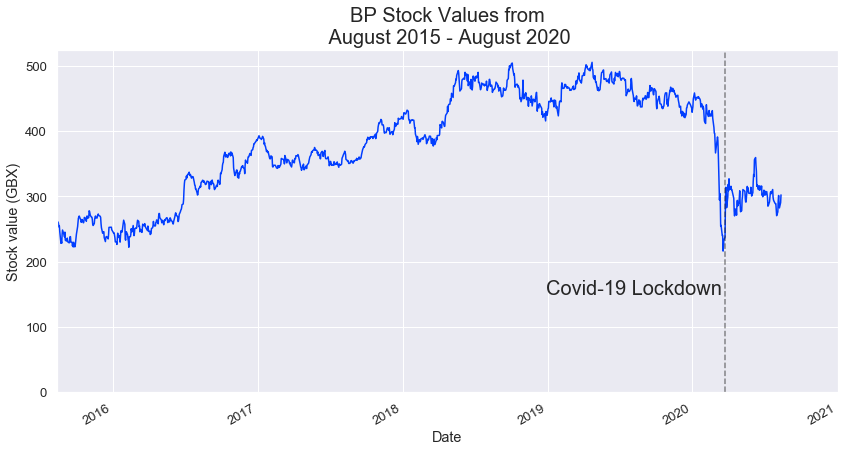

In [420]:
# Create a plot of the BP stocks from August 2015 - August 2016

sns.set(font_scale=1.2)
sns.set_palette('bright')

stocks_BP.plot(figsize=(14, 7))

plt.xlabel('Date')
plt.ylabel('Stock value (GBX)')

plt.xlim([datetime.date(2015, 8, 13), datetime.date(2021, 1, 1)])
plt.ylim(0, 525)

plt.axvline(datetime.date(2020, 3, 23), color='k', linestyle='--', alpha=0.5)
plt.annotate('Covid-19 Lockdown', xy=(datetime.date(2018, 12, 29), 150), fontsize=20)

plt.title('BP Stock Values from\n August 2015 - August 2020', fontsize=20)

### Qualitative analysis of BP stocks from August 2015 - August 2020

- From August 2015 to mid 2018, the BP stock value steadily increased, with minor fluctuations
- From mid 2018 to the start of 2020, the BP stock value fluctuated between 410 - 510 GBX but overall stayed relatively consistent 
- From the 24th February 2020 - 24th March 2020, the BP stock value decreased rapidly with a loss of 189.31 GBX overall
<br><br>
- The next graph gives a closer look at the trend of the BP stocks between the period August 2019 - August 2020

Text(0.5, 1.0, 'BP Stock Values from\n August 2015 - August 2020')

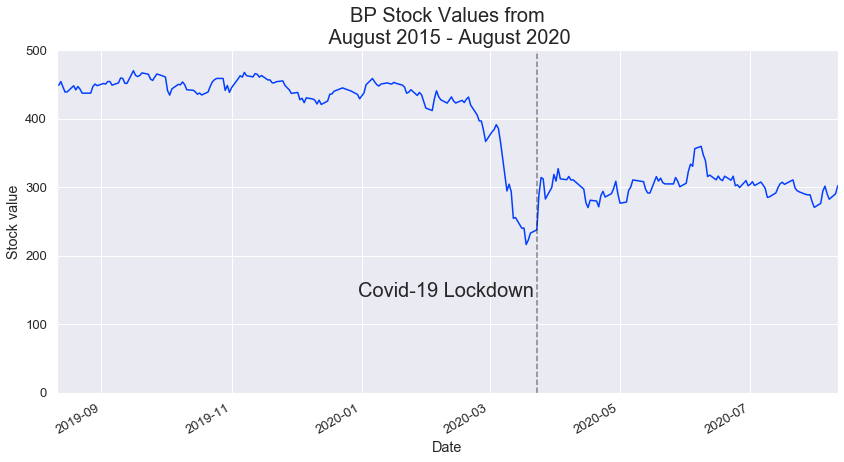

In [415]:
# Create a plot of the BP stocks from August 2019 - August 2016

stocks_BP_2019_2020 = stocks_BP['2019-08-11':'2020-08-11']


sns.set(font_scale=1.2)
sns.set_palette('bright')

stocks_BP_2019_2020.plot(figsize=(14, 7))

plt.xlabel('Date')
plt.ylabel('Stock value')

plt.xlim([datetime.date(2019, 8, 11), datetime.date(2020, 8, 11)])
plt.ylim(0, 500)

plt.axvline(datetime.date(2020, 3, 23), color='k', linestyle='--', alpha=0.5)
plt.annotate('Covid-19 Lockdown', xy=(datetime.date(2019, 12, 30), 140), fontsize=20)

plt.title('BP Stock Values from\n August 2015 - August 2020', fontsize=20)

### Qualitative analysis of BP stocks from August 2019 - August 2020

- The Covid-19 lockdown began the 23rd March 2020 therefore the BP stocks had already had their sharp decrease
    - Possibly caused by the 25-year low for the demand of fossil fuels
    - Source: [The Guardian](https://www.theguardian.com/business/2020/jun/15/bp-expects-covid-19-to-have-enduring-impact-on-global-economy)
<br><br>
- From the end of March 2020 to mid August 2020, the BP stocks fluctuated between 270 - 360 GBX 
    - BP stocks did not recover from the UK's decreased demand for fossil fuels in 2020
    - Covid-19 is the suspected cause of BP's consistently and relatively low stock prices due to the global collapse of oil demand 

In [298]:
# Load Excel data from hackathon_commodities.xlsx

commodities = load_excel_data('hackathon_commodities.xlsx', sheet_name=0, parse_dates='Date')
commodities.head()

,Date,Brent,Gold,Aluminium
0,2020-01-03,68.660004,1549.199951,1830.00
1,2020-01-05,69.570000,1571.599976,NaN
2,2020-01-06,68.500000,1566.199951,1842.00
3,2020-01-07,70.860001,1571.800049,1822.00
4,2020-01-08,65.739998,1557.400024,1802.75


In [300]:
# Clean data set from hackathon_commodities.xlsx

commodities_clean = commodities.set_index('Date').fillna(0)
commodities_clean.head()

,Brent,Gold,Aluminium
Date,,,
2020-01-03,68.660004,1549.199951,1830.00
2020-01-05,69.570000,1571.599976,0.00
2020-01-06,68.500000,1566.199951,1842.00
2020-01-07,70.860001,1571.800049,1822.00
2020-01-08,65.739998,1557.400024,1802.75


In [301]:
# Isolate the Brent column from hackathon_commodities.xlsx

brent = commodities_clean['Brent']
brent

Date
2020-01-03    68.660004
2020-01-05    69.570000
2020-01-06    68.500000
2020-01-07    70.860001
2020-01-08    65.739998
                ...    
2020-08-06    45.209999
2020-08-07    44.700001
2020-08-09    44.720001
2020-08-10    45.080002
2020-08-11    44.610001
Name: Brent, Length: 174, dtype: float64

Text(0.5, 1.0, 'Daily price of Brent Crude Oil in USD from \nJanuary 2020 - August 2020')

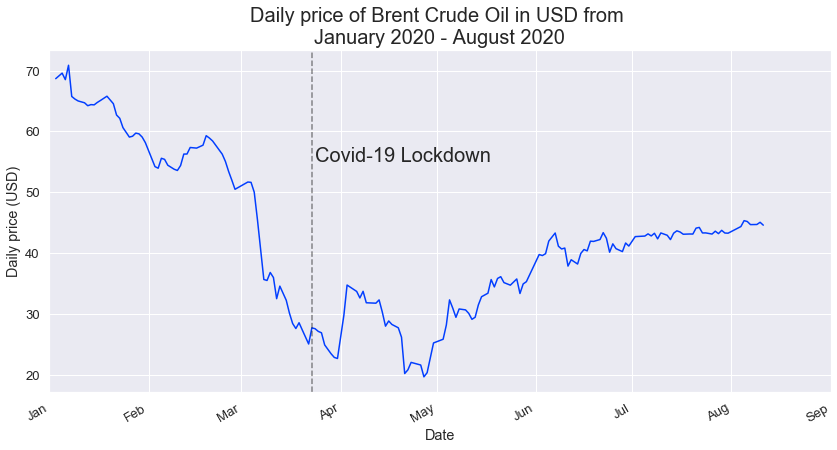

In [414]:
# Create a plot of the daily price of brent crude oil

sns.set(font_scale=1.2)
sns.set_palette('bright')

brent.plot(figsize=(14, 7))

plt.xlabel('Date')
plt.ylabel('Daily price (USD)')

plt.xlim([datetime.date(2020, 1, 1), datetime.date(2020, 9, 1)])

positions = (datetime.date(2020, 1, 1), datetime.date(2020, 2, 1), datetime.date(2020, 3, 1), datetime.date(2020, 4, 1), datetime.date(2020, 5, 1), datetime.date(2020, 6, 1), datetime.date(2020, 7, 1), datetime.date(2020, 8, 1), datetime.date(2020, 9, 1))
labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep')
plt.xticks(positions, labels)

plt.axvline(datetime.date(2020, 3, 23), color='k', linestyle='--', alpha=0.5)
plt.annotate('Covid-19 Lockdown', xy=(datetime.date(2020, 3, 24), 55), fontsize=20)

plt.title('Daily price of Brent Crude Oil in USD from \nJanuary 2020 - August 2020', fontsize=20)

In [259]:
# Group the BP data by year, and take the mean for each group (i.e. each year)

stocks_BP_year = stocks_BP.resample('Y').mean()
stocks_BP_year

Date
2015-12-31    251.597143
2016-12-31    297.609549
2017-12-31    369.547563
2018-12-31    445.290936
2019-12-31    461.831037
2020-12-31    336.855261
Freq: A-DEC, Name: BP, dtype: float64

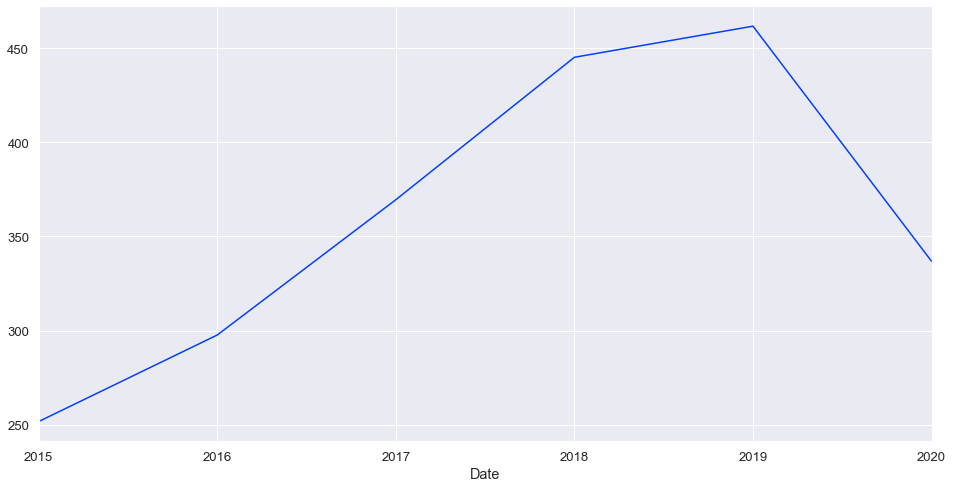

In [281]:
stocks_BP_year.plot(figsize=(16, 8))

# Create a plot of the BP stocks from August 2015 - August 2016

stocks_BP_2019_2020 = stocks_BP['2019-08-11':'2020-08-11']


sns.set(font_scale=1.2)
sns.set_palette('bright')

stocks_BP_2019_2020.plot(figsize=(14, 7))

plt.xlabel('Date')
plt.ylabel('Stock value')

plt.xlim([datetime.date(2019, 8, 11), datetime.date(2020, 8, 11)])
plt.ylim(0, 500)

plt.axvline(datetime.date(2020, 3, 23), color='k', linestyle='--', alpha=0.5)
plt.annotate('Covid-19 Lockdown', xy=(datetime.date(2020, 1, 1), 1), xytext=(datetime.date(2019, 12, 30), 140), fontsize=20)

plt.title('BP Stock Values from\n August 2015 - August 2020', fontsize=20)

In [260]:
# Group the data by month, and take the mean for each group (i.e. each month)

stocks_BP_months = stocks_BP.resample('M').mean()
stocks_BP_months

Date
2015-08-31    248.073620
2015-09-30    231.876747
2015-10-31    262.017305
2015-11-30    268.242836
2015-12-31    246.193345
                 ...    
2020-04-30    296.325304
2020-05-31    301.768359
2020-06-30    319.733451
2020-07-31    296.138203
2020-08-31    291.064200
Freq: M, Name: BP, Length: 61, dtype: float64